<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv
from pprint import pprint

sat_scores = './sat_scores.csv'
with open(sat_scores) as scores:
    reader = csv.reader(scores)
    scores_list = []
    for row in reader:
        scores_list.append(row)
    pprint (scores_list[:10])


[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500']]


In [3]:
#converting the list of lists to a dictionary:
scores_dict = {
    # scores_list[0][i]: [scores_list[1][0], scores_list[k][i], ... scores_list[52][0]],
    # scores_list[0][i]: [scores_list[1][1], scores_list[2][1], ... scores_list[52][1]],
    # scores_list[0][i]: [scores_list[1][2], scores_list[2][2], ... scores_list[52][2]],
    # scores_list[0][i]: [scores_list[1][3], scores_list[2][3], ... scores_list[52][3]],
}


# create dictionary keys
k = 0
while k < len(scores_list[0]):
    scores_dict[scores_list[0][k]] = []
    k += 1
    
#create the dictionary values, which is the list
k = 1
while k < len(scores_list):
    i = 0
    while i < len(scores_list[0]):
        scores_dict[scores_list[0][i]].append(scores_list[k][i])
        i += 1
    k += 1

pprint(scores_dict)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

In [4]:
#convert drugs list of lists to a dictionary

#drugs_dict = {}
#
##create dictionary keys
#k = 0
#while k < len(drugs_list[0]):
#    drugs_dict[drugs_list[0][k]] = []
#    k += 1
#    
##create dictionary values
#k = 1
#while k < len(drugs_list):
#    i = 0
#    while i < len(drugs_list[0]):
#        drugs_dict[drugs_list[0][i]].append(drugs_list[k][i])
#        i += 1
#    k += 1
#
#pprint(drugs_dict)

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# convert scores_dict into a pandas DataFrame
scores_dict_df = pd.DataFrame(scores_dict)
scores_dict_df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [6]:
scores_pd_df = pd.read_csv(sat_scores)
scores_pd_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

**ANSWER**
The difference between the two methods is by:
a) converting the data dictionary to a DataFrame returns the numpy array values as object types
b) converting the data directly from the csv file to a pandas DataFrame returns int types

**QUESTION**
Is there a preferred way? I tend to be inclined to pass the csv file directly into a pandas DataFrame.

If you did not, convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [7]:
scores_dict['Rate']=[float(entry) for entry in scores_dict['Rate'] if entry.isdigit()]

In [8]:
scores_dict['Verbal']=[float(entry) for entry in scores_dict['Verbal'] if entry.isdigit()]

In [9]:
scores_dict['Math']=[float(entry) for entry in scores_dict['Math'] if entry.isdigit()]

In [10]:
#pass the edited scores dictionary into a pandas DataFrame and check datatypes
scores_dict_df = pd.DataFrame(scores_dict)
scores_dict_df.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
scores_dict_df.head(10)
# columns won't print in the same order as if we were to directly pass it to a pandas DataFrame first

,Math,Rate,State,Verbal
0,510.0,82.0,CT,509.0
1,513.0,81.0,NJ,499.0
2,515.0,79.0,MA,511.0
3,505.0,77.0,NY,495.0
4,516.0,72.0,NH,520.0
5,499.0,71.0,RI,501.0
6,499.0,71.0,PA,500.0
7,506.0,69.0,VT,511.0
8,500.0,69.0,ME,506.0
9,501.0,68.0,VA,510.0


In [12]:
scores_pd_df.head(10)
#rate means the percentile that score placed into for that particular exam
#scores is the entire data set for a particular exam adminstered across all states 

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [13]:
scores_list_obj = []
scores_dict_obj = {}

In [14]:
Variables = [col for col in scores_pd_df]
scores_list_obj.append(Variables)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math']]

In [15]:
Types = [type(scores_pd_df[col][0]) for col in scores_pd_df]
scores_list_obj.append(Types)
scores_list_obj

Types_dict ={}
Types_dict['Math'] = type(scores_pd_df['Math'][0])
Types_dict['Rate'] = type(scores_pd_df['Rate'][0])
Types_dict['State'] = type(scores_pd_df['State'][0])
Types_dict['Verbal'] = type(scores_pd_df['Verbal'][0])

Types_dict

{'Math': numpy.int64, 'Rate': numpy.int64, 'State': str, 'Verbal': numpy.int64}

In [16]:
Descriptions = ['where SAt was administered', 
               '% of total students taking SAT', 
               'score for Verbal section', 
               'score for Math section']
scores_list_obj.append(Descriptions)
scores_list_obj

[['State', 'Rate', 'Verbal', 'Math'],
 [str, numpy.int64, numpy.int64, numpy.int64],
 ['where SAt was administered',
  '% of total students taking SAT',
  'score for Verbal section',
  'score for Math section']]

In [17]:
descr_dict = {}

descr_dict['Math'] = scores_list_obj[2][3]
descr_dict['Verbal'] = scores_list_obj[2][2]
descr_dict['Rate'] = scores_list_obj[2][1]
descr_dict['State'] = scores_list_obj[2][0]

In [18]:
Shape = scores_pd_df.shape

In [19]:
scores_dict_obj['Variables'] = Variables
scores_dict_obj['Types'] = Types_dict
scores_dict_obj['Shape'] = Shape
scores_dict_obj['Descriptions'] = descr_dict

pprint (scores_dict_obj)

{'Descriptions': {'Math': 'score for Math section',
                  'Rate': '% of total students taking SAT',
                  'State': 'where SAt was administered',
                  'Verbal': 'score for Verbal section'},
 'Shape': (52, 4),
 'Types': {'Math': <class 'numpy.int64'>,
           'Rate': <class 'numpy.int64'>,
           'State': <class 'str'>,
           'Verbal': <class 'numpy.int64'>},
 'Variables': ['State', 'Rate', 'Verbal', 'Math']}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

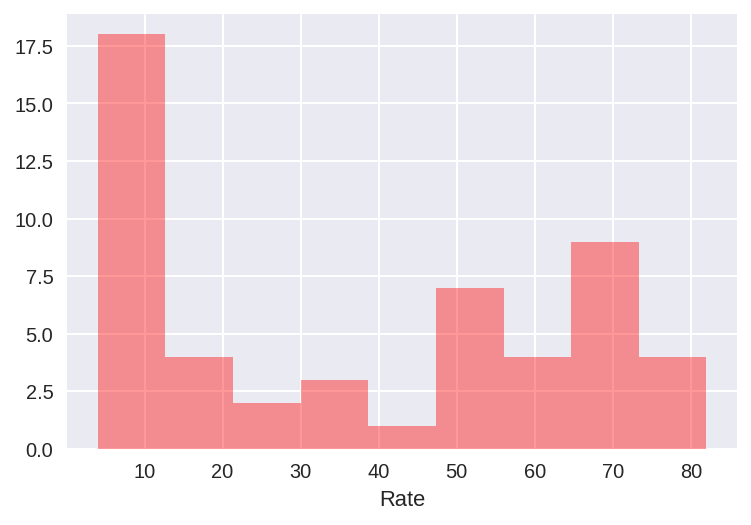

In [21]:
sns.distplot(scores_pd_df['Rate'], kde=False, bins=9, color='r')
plt.show()

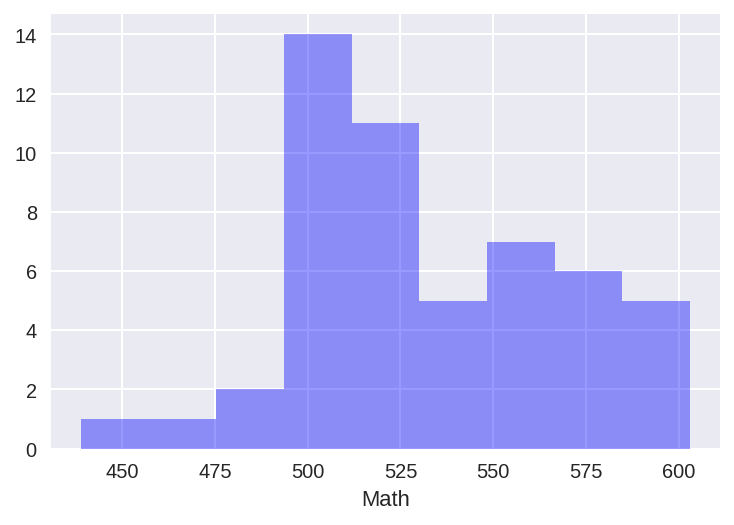

In [22]:
sns.distplot(scores_pd_df['Math'], kde=False, bins=9, color = 'b')
plt.show()

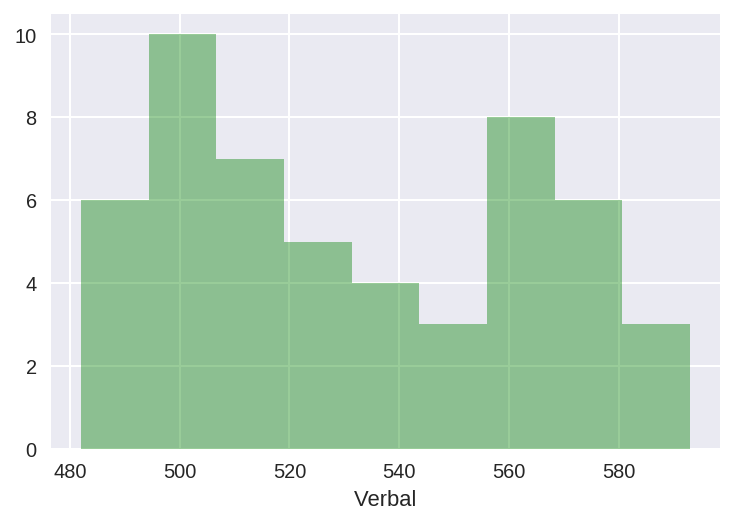

In [23]:
sns.distplot(scores_pd_df['Verbal'], kde=False, bins=9, color ='g')
plt.show()
# people generally score better in Verbbal than in Math
# lowest score in Verbal is 482, while in Math, it's < 450 per the distribution plot above

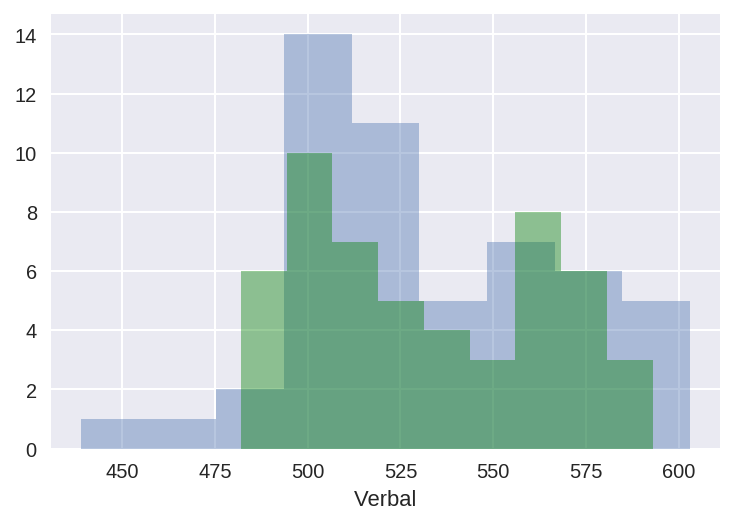

In [24]:
sns.distplot(scores_pd_df['Math'], kde=False, bins=9)
sns.distplot(scores_pd_df['Verbal'], kde=False, bins=9, color='g')
plt.show()
#just to see a joint distribution plot 

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

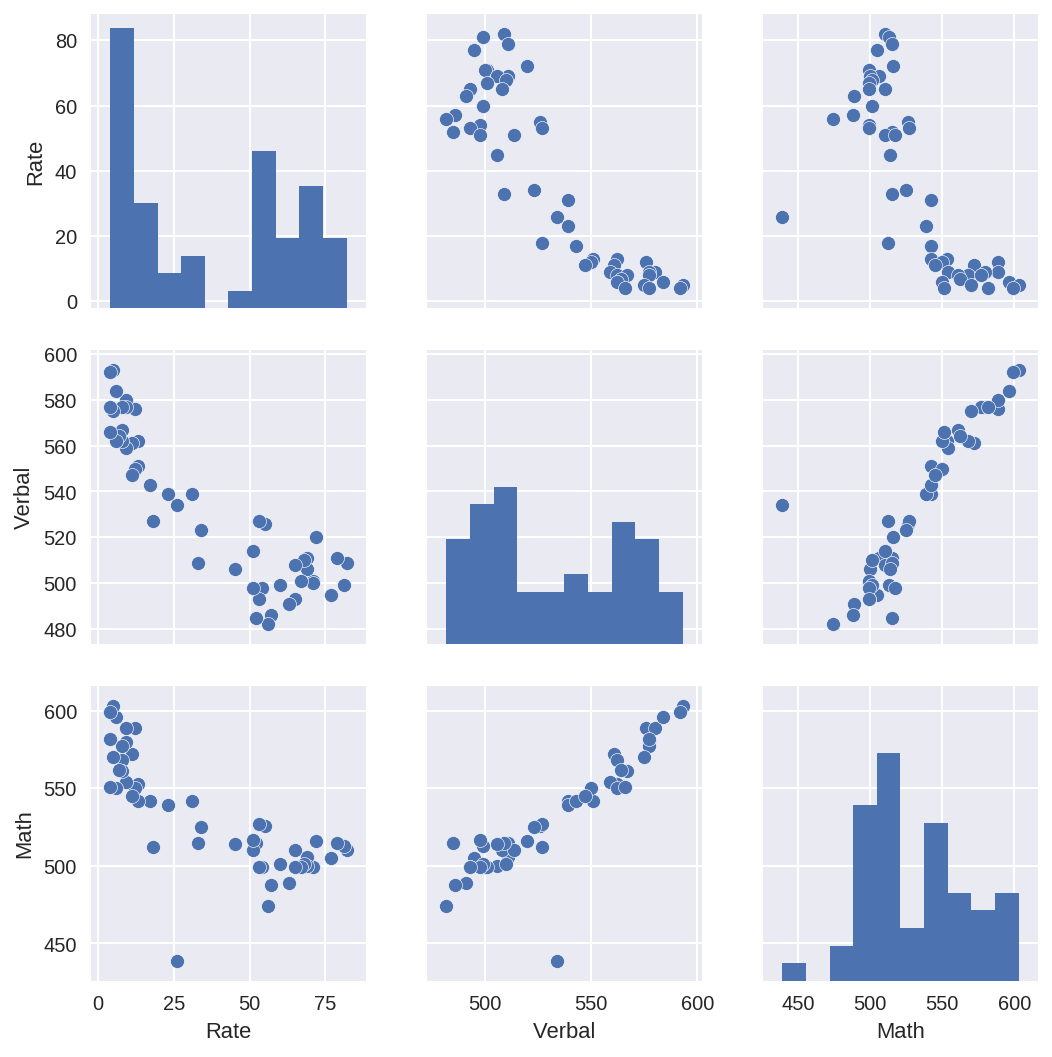

In [25]:
sns.pairplot(scores_pd_df)
plt.show()

**ANSWER**
The pairplot shows there is a strong relationship between the following variable combinations:

a) **Math Score & Verbal Score** - there is a proportionate increase in the respective scores. As verbal scores increase, so do math scores. The converse is true.

b) **Rate & Math Score** - the higher the percentage of SAT exams taken, the lower the average Math Score.

c) **Rate & Verbal Score** - the higher the percentage of SAT exams taken, the lower the average Verbal Score.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

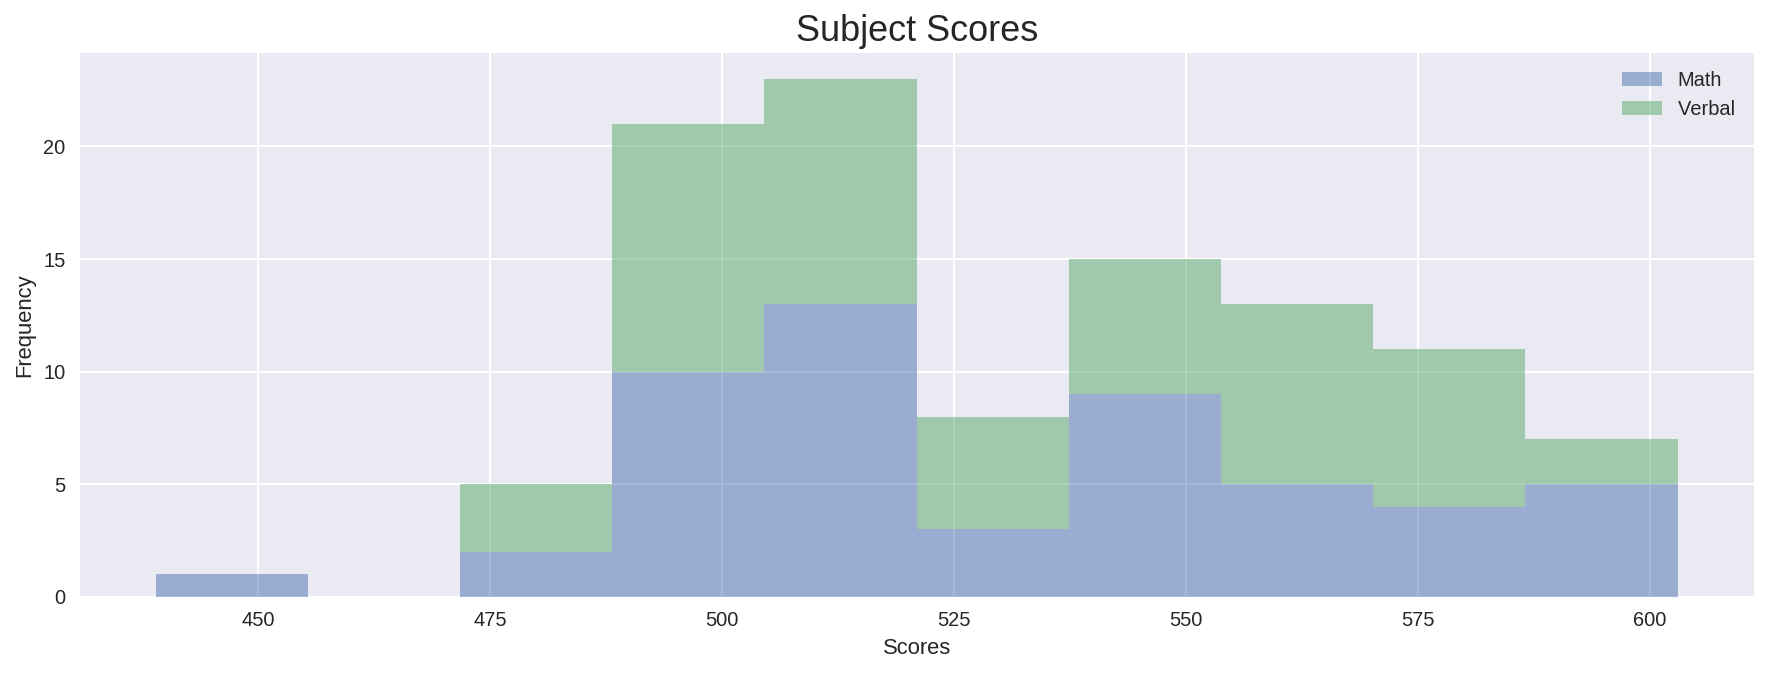

In [26]:
verb = scores_pd_df['Verbal']
math = scores_pd_df['Math']
vm_scores = scores_pd_df[['Math', 'Verbal']]

vm_scores.plot.hist(stacked=True, alpha = 0.5, figsize=(15, 5), bins=10)
plt.xlabel('Scores')
plt.title('Subject Scores', fontsize=18)

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

**ANSWER**

*Boxplot Benefits*
- The benefit of using a boxplot is it can provide some information about skewness of the data (by looking at the symmetry of the boxplot).
- The boxplot will also reveal any outliers to the extent any exist.
- The boxplot reveals quartiles as well, marked by the ends of the box.
- The median is marked by the vertical line in the box.

*Boxplot vs. Histogram*
- A histogram does not reveal outliers, median values, or quartiles well.

*Boxplots vs. Scatter Plots*
- While scatter plots do sometimes reveal outliers, it does not show quartiles, nor does it reveal median values. Further, it does not tell anything about skewness of the data.

*Issue w/ putting Rate on the same boxplot as Math & Verbal*
- Rate is not measured the same way Verbal and Math are. Each Verbal and Math scores are out of 800 total, therefore they would have the same y-axis. However, since rate is a percentile, (0-100) it would not make sense to have Rate share the same boxplot as the test scores.

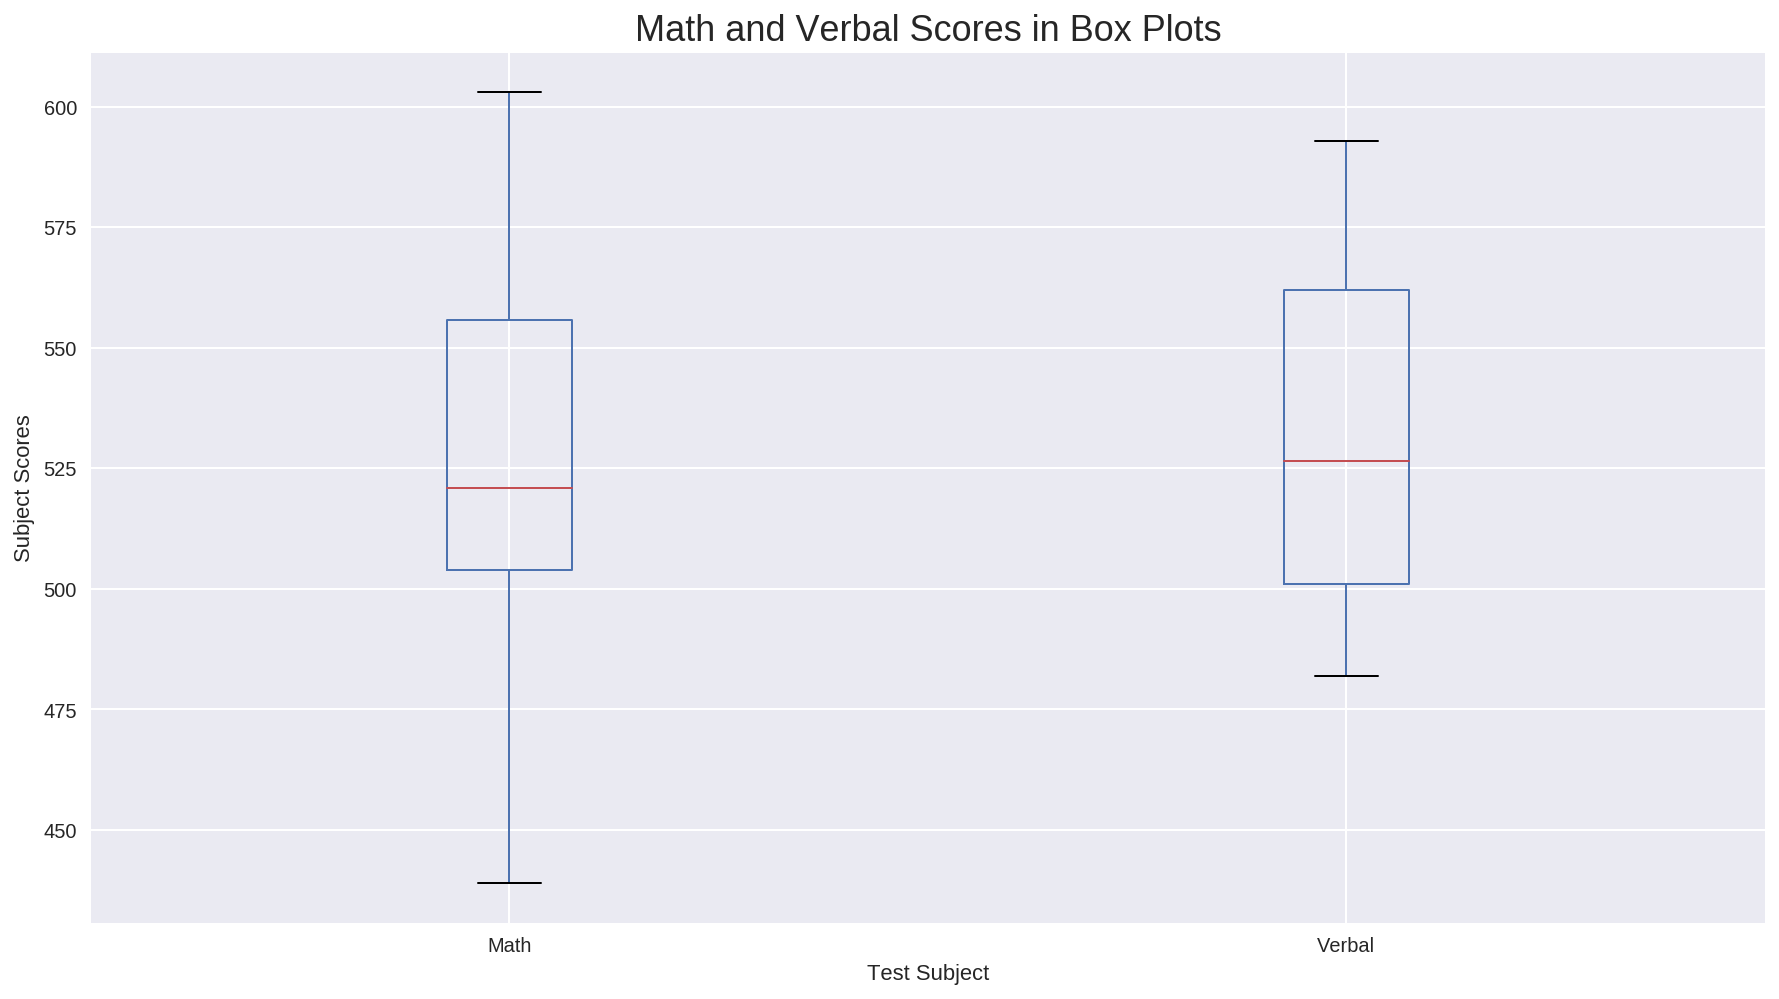

In [27]:
vm_scores.plot.box(figsize=(15, 8))
plt.xlabel('Test Subject')
plt.ylabel('Subject Scores')
plt.title ('Math and Verbal Scores in Box Plots', fontsize=18)
plt.show()

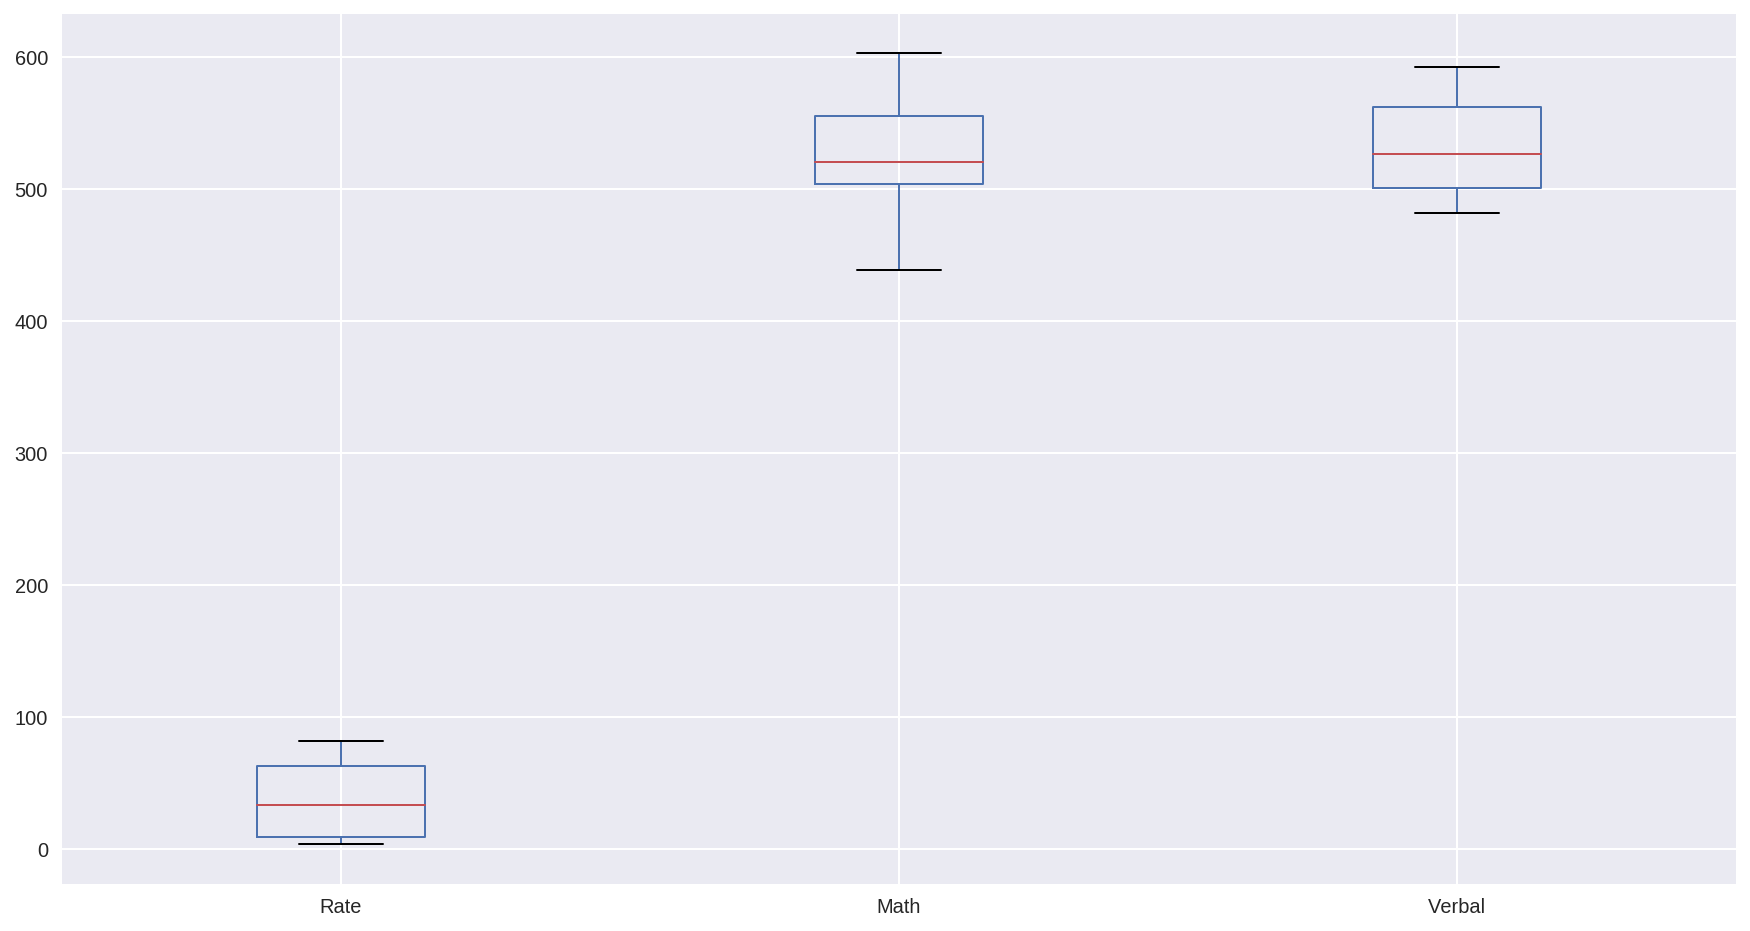

In [28]:
rmv_nums_df = scores_pd_df[['Rate', 'Math', 'Verbal']]
rmv_nums_df.plot.box(figsize=(15,8))
plt.show()

# YUCK

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [29]:
rate_df = scores_pd_df[['Rate']]

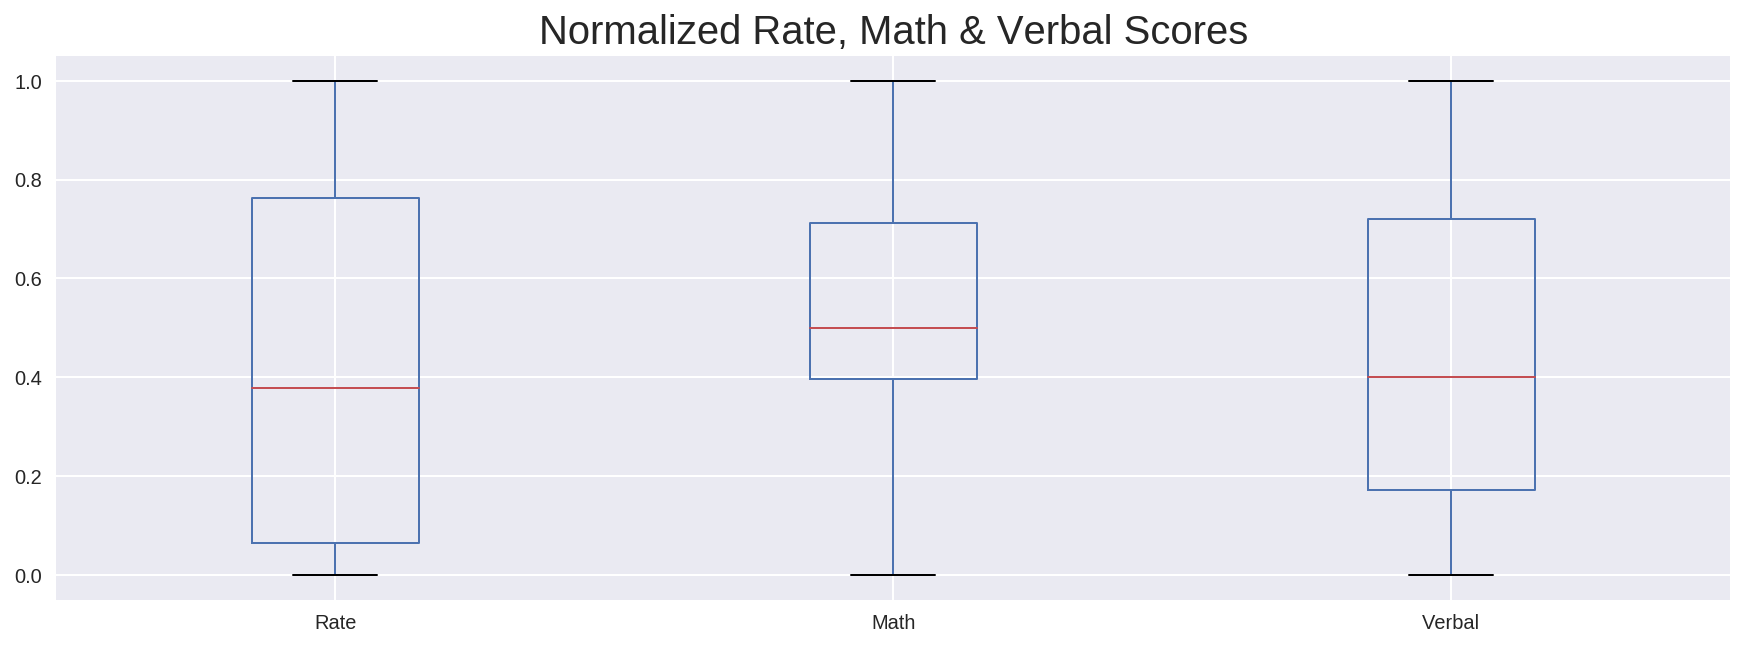

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization (MinMax Scaler)

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(rmv_nums_df)
scaled_scores[:5]

normalized_rmv_df = pd.DataFrame(scaled_scores, columns=['Rate', 'Math', 'Verbal'])
normalized_rmv_df.sample(5)
normalized_rmv_df.plot(kind='box', figsize=(15,5))
plt.title('Normalized Rate, Math & Verbal Scores', fontsize=20)
plt.show()

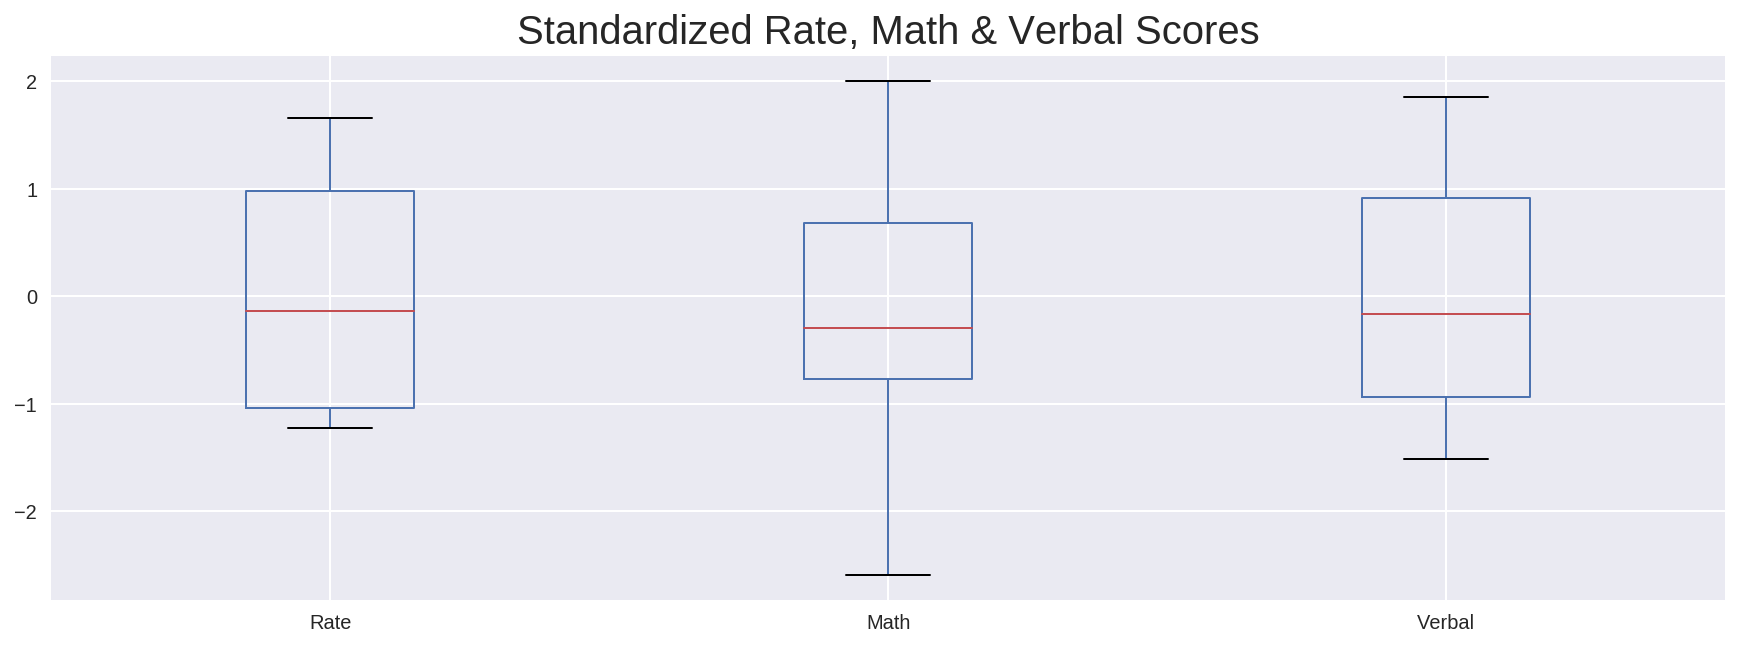

In [31]:
# Standardization

std_scaler = StandardScaler()
stdized_rmv = std_scaler.fit_transform(rmv_nums_df)
stdized_rmv[:5]

stdized_rmv_df = pd.DataFrame(stdized_rmv, columns=['Rate', 'Math', 'Verbal'])
stdized_rmv_df.sample(5)
stdized_rmv_df.plot(kind='box', figsize=(15,5))
plt.title('Standardized Rate, Math & Verbal Scores', fontsize=20)
plt.show()

**ANSWER** 

In comapring the two methods *Normalization* vs. *Standardization*, I am more inclined to use the Standardization method because the type of numeric values of Rate range from 0-100. In taking the min/max of that portion of the data, it would throw off the normalization slightly since the values in the Range column are very disparate compared to the  Verbal & Math Scores. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [32]:
above_avg_verb = scores_pd_df[scores_pd_df['Verbal'] > scores_pd_df['Verbal'].mean()][['State', 'Verbal']].sort_values(by=['Verbal'], ascending=False)
above_avg_verb[:5]

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577


In [33]:
above_avg_verb['State'].nunique()

24

In [34]:



#INSERT TYPED RESPONSE TO THIS QUESTION HERE





### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [35]:
above_med_verb = scores_pd_df[scores_pd_df['Verbal'] > scores_pd_df['Verbal'].median()][['State', 'Verbal']].sort_values(by=['Verbal'], ascending=False)
above_med_verb[:5]

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
38,KS,577



**ANSWER**
This tells me the mean and median are close in value, therefore there is not much skewness in the distribution of the Verbal score. This means that the data tends to be in the center. 



### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [36]:
scores_pd_df.shape

(52, 4)

In [37]:
vm_score_diff = np.array(scores_pd_df['Verbal'] - scores_pd_df['Math'])

In [38]:
scores_pd_df['Verb-Math'] = vm_score_diff

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [39]:
VM_descending = scores_pd_df.sort_values(by='Verb-Math', ascending=False)
   

In [40]:
VM_Rank = []

i = 1
while i <= len(VM_descending):
    VM_Rank.append(i)
    i +=1

VM_descending['VM Rank'] = np.array(VM_Rank)
top10_vmdiff = VM_descending[:10]
top10_vmdiff[:3]

,State,Rate,Verbal,Math,Verb-Math,VM Rank
27,OH,26,534,439,95,1
50,MS,4,566,551,15,2
29,WV,18,527,512,15,3


In [41]:
mv_diff = scores_pd_df['Math'] - scores_pd_df['Verbal']
scores_pd_df['Math-Verb'] = mv_diff
MV_descending = scores_pd_df.sort_values(by='Math-Verb', ascending=False)

MV_Rank = []
i=1
while i <= len(MV_descending):
    MV_Rank.append(i)
    i += 1

MV_descending['MV Rank'] = MV_Rank
MV_descending = MV_descending.drop('Verb-Math', axis=1)
MV_descending.head()

top10_mvdiff = MV_descending[:10]
top10_mvdiff[:3]

,State,Rate,Verbal,Math,Math-Verb,MV Rank
21,HI,52,485,515,30,1
23,CA,51,498,517,19,2
1,NJ,81,499,513,14,3


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [42]:
MV_descending.sample(5)
#already excludes 'State'

,State,Rate,Verbal,Math,Math-Verb,MV Rank
39,AL,9,559,554,-5,42
0,CT,82,509,510,1,24
27,OH,26,534,439,-95,52
37,MN,9,580,589,9,9
20,TX,53,493,499,6,12


In [43]:
MV_descending.corr()

,Rate,Verbal,Math,Math-Verb,MV Rank
Rate,1.000000,-0.886432,-0.773746,0.101412,-0.066394
Verbal,-0.886432,1.000000,0.899871,-0.052600,0.010997
Math,-0.773746,0.899871,1.000000,0.388219,-0.289269
Math-Verb,0.101412,-0.052600,0.388219,1.000000,-0.685541
MV Rank,-0.066394,0.010997,-0.289269,-0.685541,1.000000


**ANSWER**
The correlation coefficient matrix will return values between 0 and 1, with values being closer to 1 indicating how closely related two given variables are in the matrix. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [44]:
Describe = MV_descending.describe()
Describe

,Rate,Verbal,Math,Math-Verb,MV Rank
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,-0.519231,26.500000
std,27.301788,33.236225,36.014975,15.729939,15.154757
min,4.000000,482.000000,439.000000,-95.000000,1.000000
25%,9.000000,501.000000,504.000000,-4.250000,13.750000
50%,33.500000,526.500000,521.000000,0.000000,26.500000
75%,63.500000,562.000000,555.750000,6.000000,39.250000
max,82.000000,593.000000,603.000000,30.000000,52.000000


**ANSWER**
- Count : indicates the number of values in the respective columns
- Mean : shows the average of all the values for each of the respective columns
- Std : reflects the standard deviation for the values in each of the respective columns
- Min : reflects the smallest value for a given column
- 25% : reflects the 25th percentile value. This means that 25% of the values for a given column are less than the value reflected here.
- 50% : same explanation as 25%, except it applies to the 50th percentile.
- 75% : same explanation as 25%, except it applies to the 75th percentile.
- Max : reflects the largest value for a given columm

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [45]:
MV_descending.cov()

,Rate,Verbal,Math,Math-Verb,MV Rank
Rate,745.387632,-804.355958,-760.803922,43.552036,-27.470588
Verbal,-804.355958,1104.646682,1077.147059,-27.499623,5.539216
Math,-760.803922,1077.147059,1297.078431,219.931373,-157.882353
Math-Verb,43.552036,-27.499623,219.931373,247.430995,-163.421569
MV Rank,-27.470588,5.539216,-157.882353,-163.421569,229.666667


**ANSWER**

1) Describe how the covariance matrix is different from the correlation matrix.
- The covariance measures:
- The correlation measures:


2) What is the process to convert the covariance into correlation?



3) Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
- 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [46]:
drug_use = './drug-use-by-age.csv'
drugs_pd_df = pd.read_csv(drug_use)

In [47]:
drugs_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [48]:
clean_drugs_df = drugs_pd_df.iloc[:, 1:].apply(pd.to_numeric, errors = 'coerce')
# to replace the '-' with Nan 

In [49]:
clean_drugs_df['age'] = drugs_pd_df['age']
# notably, I'm not converting the age to a float or int type because I want to keep the integrity of the age ranges

In [60]:
clean_drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        16 non-null float64
tranqu

In [51]:
clean_drugs_df['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

In [70]:
clean_drugs_df

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,12
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


In [52]:
clean_drugs_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [53]:
clean_drugs_df['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

In [54]:
clean_drugs_df

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,12
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


In [71]:
age_freq_use_df = clean_drugs_df.drop('n', axis=1)

In [75]:
age_freq_use_df

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age
0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,12
1,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


In [55]:
# subset the drugs data to only capture the age ranges of 12-21 because it will capture information for
# drug use at various ages leading up to the age range when SAT exams are taken (such as 15-18)
# then also examine drug use after SAT exams are taken
# compare all against the Rate column in the SAT dataframe, which I assumed to reflect the percentage of students 
# who actually sat for the SAT exam in their respective states. 

**Hypothesis:** 
Drug use increases in the early 20's and then decreases in age group 30's onward.

Hopefully be able to suggest a new policy for pro-active drug education and prevention at age ranges that precede the peak age ranges.

Examine certain drug types and compare them to each other. Average the frequncy, but not the percentages. 

- DO NOT use the Meth data, it's strange.
- DO NOT use the Sedative data, it's strange.
- Meth vs. Heroin comparison, strange increase in frequency at age 19.
- 



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [56]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.